In [141]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from generate_data import SyntheticDataset

In [3]:
from model import GolemTS
from generate_data import SyntheticDataset
import numpy as np


In [4]:
import torch

In [21]:
A_init = np.random.randn(20, 5)
dag_obj = SyntheticDataset(1000, 5, 3, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS(n=1000, d=5, p=3, Y=dag_obj.Y, lambda_1=2e-3, lambda_2=5.0, A_init=A_init, ev=True)

tensor(-0.1863)


In [22]:
import trainer

In [29]:
trainer.train(model, dag_obj.Y, epochs=10_000)

tensor(-0.1745)
likelihood: 0.47935765981674194
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-0.1745)
tensor(-

In [30]:
model.A

Parameter containing:
tensor([[ 2.3954e-02,  3.9359e-03, -1.5975e-01, -3.1185e-02, -8.6861e-03],
        [ 7.0309e-01,  2.2807e-02, -5.4003e-01,  2.4874e-01,  5.8944e-01],
        [-2.7600e-02, -2.5271e-02,  2.3003e-02,  3.2027e-01,  6.1295e-02],
        [-4.8114e-01, -3.4341e-02,  5.0541e-02,  1.6326e-02, -1.6023e-02],
        [-1.5139e+00,  3.7871e-02,  3.9425e-01, -1.4676e+00,  2.5723e-02],
        [ 4.3636e-02, -1.6584e-02,  1.0338e-02, -4.4387e-02, -3.1040e-02],
        [ 2.7240e-02,  5.3945e-06,  8.5326e-03,  1.8345e-02, -3.8289e-04],
        [ 3.4187e-02,  6.1424e-02,  3.8525e-03,  4.4378e-05, -3.3811e-03],
        [ 1.2691e-04,  5.4147e-02, -3.6419e-03,  9.0802e-05, -3.1675e-03],
        [-1.2125e-02, -7.1768e-03, -2.6051e-01,  4.1389e-02,  4.8246e-01],
        [-2.0132e-02,  2.3133e-04,  4.0793e-01,  1.9593e-01, -5.9647e-02],
        [ 1.6377e-02, -6.4025e-02,  1.0622e-02, -1.1322e-02,  3.9918e-01],
        [-1.9521e-03, -2.8649e-01,  9.4728e-02, -1.1983e-02, -6.9773e-02],
   

In [31]:
dag_obj.A

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.81744217,  0.        , -0.74806149,  0.        ,  0.70891452],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.68278624,  0.        ,  0.57493019,  0.        ,  0.        ],
       [-1.85247975,  0.        ,  1.30384461, -1.32815971,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.32619937,  0.        ,  0.48372036],
       [ 0.        ,  0.        ,  0.30885446,  0.3887616 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.44113643],
       [ 0.        , -0.33356616,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.4

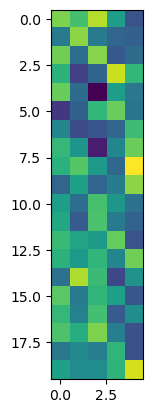

In [32]:
plt.imshow(A_init)

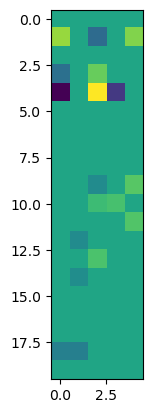

In [33]:
plt.imshow(dag_obj.A)

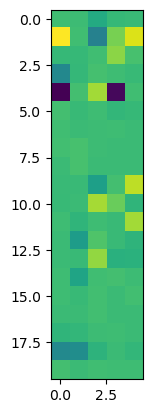

In [34]:
plt.imshow(model.A.detach().numpy())

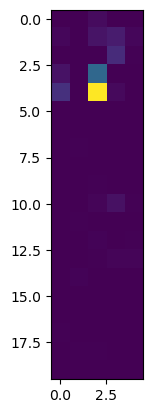

In [35]:
plt.imshow((model.A.detach().numpy() - dag_obj.A)**2)

In [11]:
model.A

Parameter containing:
tensor([[ 9.3583e-03,  2.5606e-01,  8.0136e-01,  8.6461e-01, -8.1033e-01],
        [ 2.5313e-02,  5.5689e-04, -1.4680e+00,  1.2072e+00,  1.3941e-01],
        [-2.4044e-03, -1.5610e-04, -7.4495e-05,  1.3498e-02, -1.2908e-01],
        [-2.3347e-02,  1.0141e-01,  2.1718e-01,  1.9074e-02, -4.0222e-01],
        [-4.6154e-03,  9.5777e-04,  1.3736e-01,  1.5085e-03, -6.4178e-04],
        [-1.9533e-01, -2.2515e-01,  7.4104e-03, -6.0462e+00,  1.0449e-01],
        [ 3.1536e-04, -9.0698e-01,  1.7973e-01,  7.1254e+00, -1.8126e-01],
        [-1.5110e+00,  2.0743e-04,  1.2258e-01,  1.5761e-01,  1.1539e+00],
        [-2.4521e-04, -1.4386e-04,  1.6396e-01, -2.2943e-04, -1.0076e-01],
        [ 3.1126e-02, -8.7704e-01,  1.3951e-02,  4.8585e+00, -1.3651e-01],
        [-6.9312e-01, -3.3728e-01,  5.4073e-02,  7.4855e+00,  1.6957e-01],
        [ 2.3312e+00, -2.6674e+00,  1.2223e-02,  6.1847e+00, -6.2010e-01],
        [-5.6409e+00,  3.1081e+00,  5.6358e-03,  5.1738e+00, -2.3226e+00],
   

In [42]:
def _compute_likelihood(Y, A):
    with torch.no_grad():
        I = np.eye(20)
        ep = 1e-4
        Binv = model.U - A
        B = torch.pinverse(Binv)
            # print(self.A)
            # print(Binv)
            # print(self.Y @ Binv)
        omega = torch.diag(torch.diag((Y @ Binv).T @ (Y @ Binv))) / 1000
        print(omega)
            # print((self.Y @ Binv).T @ (self.Y @ Binv))
        print(torch.det(B.T @ omega @ B + ep * I))
        print(B.T @ omega @ B)
        print(np.linalg.eig((B.T @ omega @ B).detach().numpy())[0])
        return 0.5 * torch.logdet(B.T @ omega @ B + ep * I)

In [43]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), torch.tensor(dag_obj.A, dtype=torch.float32))




tensor([[1.5353, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.4617, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.4798, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.5511, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.4973]])
tensor(1.6221e-60, dtype=torch.float64)
tensor([[ 1.3719,  0.2361,  0.0493, -0.1240,  0.0066,  0.0000,  0.3726, -0.4985,
          0.0000,  0.0000,  0.0000,  0.0000, -0.4956,  0.0000,  0.0000,  0.0000,
         -0.4782,  0.0000,  0.0000,  0.3625],
        [ 0.2361,  1.4617, -0.4642, -0.4829,  0.6955,  0.0000,  0.3288,  0.3913,
          0.0000,  0.0000,  0.0000,  0.0000, -0.4373,  0.0000,  0.0000,  0.0000,
          0.3753,  0.0000,  0.0000,  0.3199],
        [ 0.0493, -0.4642,  1.5454,  0.1855, -0.1382,  0.0000, -0.3754,  0.1831,
          0.0000,  0.0000,  0.0000,  0.0000,  0.4994,  0.0000,  0.0000,  0.0000,
          0.1756,  0.0000,  0.0000, -0.3653],
        [-0.1240, -0.4829,  0.1855,  0.8953, -0.4898,  0.0000, -0.3922, -0.6627,
    

tensor(-68.8357, dtype=torch.float64)

In [44]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), model.A)


tensor([[12.5450,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.5571,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  5.4536,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, 32.2550,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.4577]])
tensor(1.5302e-61, dtype=torch.float64)
tensor([[ 1.8100e-01,  1.3996e-03,  1.3297e-01, -6.8358e-03,  4.7284e-02,
          7.6218e-02,  8.2772e-02, -9.3383e-02,  2.0226e-01,  1.7082e-01,
          6.1558e-02,  5.9235e-02, -1.3204e-01, -9.7062e-02,  5.5634e-02,
          7.5472e-02, -7.0946e-02,  8.8355e-02,  1.0942e-01,  3.1893e-02],
        [ 1.3996e-03,  4.3892e-01,  7.0722e-02,  1.6990e-01,  7.7348e-02,
         -8.4432e-02, -1.9509e-01, -1.0817e-02,  6.2801e-02,  2.9548e-02,
          1.3516e-01, -1.4971e-01,  5.8771e-02, -1.4901e-01,  8.1229e-02,
          1.3340e-01, -8.7994e-02,  6.9470e-02, -1.0914e-01, -7.1016e-03],
        [ 1.3297e-01,  7.0722e-02,  2.7373e-01, -2.2049e-02,  2.5455e-02,
          8.3317

tensor(-70.0161, dtype=torch.float64)

In [20]:
model.A

Parameter containing:
tensor([[-6.7983e-04,  4.7921e-01, -2.6376e-01,  ..., -4.9392e-01,
         -1.9254e+00, -4.7832e-04],
        [-1.3927e-03,  7.5130e-04, -7.2145e-01,  ...,  1.6937e+00,
          1.1800e+00,  9.8079e-03],
        [ 1.5770e+00,  3.2433e-01,  1.9912e-04,  ..., -2.5342e+00,
         -5.4728e-01,  7.4730e-01],
        ...,
        [-5.0863e-01,  1.5533e+00, -9.3559e-01,  ..., -4.8247e-01,
          1.9320e-01, -1.5155e-01],
        [ 1.5120e-01,  3.7256e-01,  3.1464e-01,  ..., -2.8972e-01,
          9.3236e-02,  1.7088e+00],
        [ 6.5742e-01,  8.2346e-02,  1.6055e-01,  ...,  4.0668e-01,
         -5.9718e-01,  2.0148e+00]], requires_grad=True)

In [25]:
model.A.detach().numpy()  - dag_obj.A

array([[-6.79826306e-04,  4.79212493e-01, -2.63758361e-01, ...,
        -4.93924856e-01, -1.92541766e+00, -4.78318747e-04],
       [-1.39268942e-03,  7.51298910e-04, -7.21449792e-01, ...,
         1.69374144e+00, -5.51100727e-01,  9.80791729e-03],
       [ 1.57697403e+00,  3.24333429e-01,  1.99115428e-04, ...,
        -2.53417015e+00,  3.78803345e-01, -1.05911934e+00],
       ...,
       [-5.08634031e-01,  1.55329883e+00, -9.35586751e-01, ...,
        -4.82470393e-01,  1.93203062e-01, -1.51545763e-01],
       [ 1.51200384e-01,  3.72558057e-01,  3.14641416e-01, ...,
        -2.89724261e-01,  9.32363272e-02,  1.70876610e+00],
       [ 6.57421172e-01,  8.23455229e-02,  1.60553500e-01, ...,
         4.06680346e-01, -5.97177625e-01,  2.01480770e+00]])

In [23]:
model.A.detach().numpy()

array([[-6.7982631e-04,  4.7921249e-01, -2.6375836e-01, ...,
        -4.9392486e-01, -1.9254177e+00, -4.7831875e-04],
       [-1.3926894e-03,  7.5129891e-04, -7.2144979e-01, ...,
         1.6937414e+00,  1.1800190e+00,  9.8079173e-03],
       [ 1.5769740e+00,  3.2433343e-01,  1.9911543e-04, ...,
        -2.5341702e+00, -5.4727811e-01,  7.4729908e-01],
       ...,
       [-5.0863403e-01,  1.5532988e+00, -9.3558675e-01, ...,
        -4.8247039e-01,  1.9320306e-01, -1.5154576e-01],
       [ 1.5120038e-01,  3.7255806e-01,  3.1464142e-01, ...,
        -2.8972426e-01,  9.3236327e-02,  1.7087661e+00],
       [ 6.5742117e-01,  8.2345523e-02,  1.6055350e-01, ...,
         4.0668035e-01, -5.9717762e-01,  2.0148077e+00]], dtype=float32)